In [77]:
import os
os.chdir("SupervisedLearning")

FileNotFoundError: [Errno 2] No such file or directory: 'SupervisedLearning'

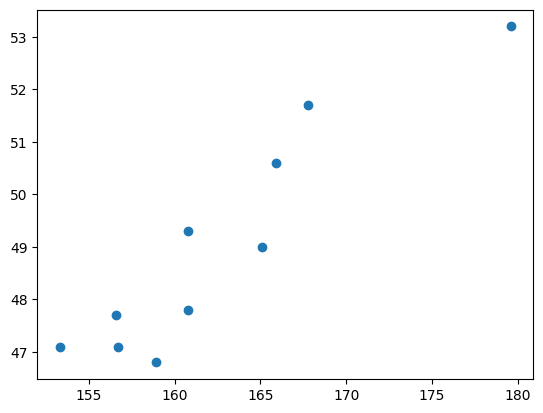

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/sl_linreg_ex_ring.csv")
plt.figure()
plt.scatter(df["height"], df["ringlength"])
plt.show()

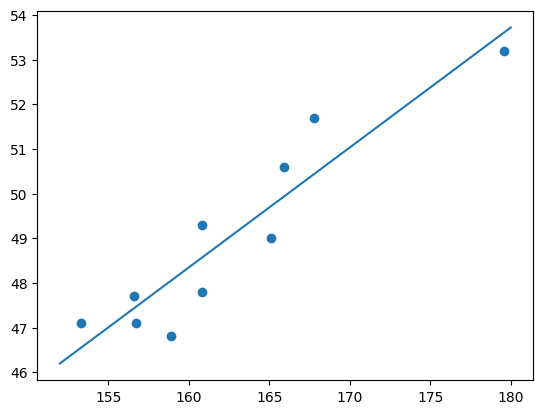

In [13]:
from sklearn.linear_model import LinearRegression

X = df["height"].to_numpy().reshape(-1,1)
Y = df["ringlength"].to_numpy().reshape(-1,1)

regr = LinearRegression().fit(X,Y)

xpts = np.linspace(152,180,1000)
plt.figure()
plt.plot(xpts, regr.predict(xpts.reshape(-1,1)))
plt.scatter(df["height"],df["ringlength"])
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
regr.fit(X_train, y_train)
regr.score(X_train,y_train)

0.8555125038318172

In [41]:
regr.score(X_test, y_test)

0.8883171870702611

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(),X,Y, cv =3)
scores

array([0.75468997, 0.74975476, 0.77382931])

In [31]:
scores.mean()

np.float64(0.7594246779223471)

In [79]:
df = pd.read_csv("./data/sl_linreg_ex_fitting.csv")

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

df_test = pd.read_csv("./data/sl_linreg_ex_fitting_test.csv")

X_test = df_test["x"].to_numpy().reshape(-1,1)
y_test = df_test["y"].to_numpy().reshape(-1,1)

In [59]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(9)

X_ext = poly.fit_transform(X)
X_ext_test = poly.fit_transform(X_test) 

poly_regr = LinearRegression().fit(X_ext,y)
poly_regr.score(X_ext,y)

0.9999999999999357

In [60]:
poly_regr.score(X_ext_test, y_test)

0.7886374017790053

In [62]:
from sklearn.linear_model import Ridge

ridge_regr = Ridge(alpha=0.2).fit(X_ext,y)
ridge_regr.score(X_ext,y)

/Users/maltescharf/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.95096e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.9907807584750258

In [63]:
ridge_regr.score(X_ext_test, y_test)

0.8679361047530296